<a href="https://colab.research.google.com/github/lKAYNONl/MLlab/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as pd
import seaborn
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score

from numpy.random import seed
from tensorflow.random import set_seed 

seed(42)
set_seed(42)

In [2]:
# set the environment variable for the API key
os.environ['KAGGLE_USERNAME'] = "kaynomi" # your Kaggle username
os.environ['KAGGLE_KEY'] = "c92a51b40c941f720d14a21ddbf7e690" # your Kaggle key

# загрузить фрейм данных из загруженного файла

!kaggle competitions download -c classification-task-simple-2022

# распаковка архива
!unzip classification-task-simple-2022.zip

# показать список всех файлов
!ls -al

 91% 10.0M/11.0M [00:01<00:00, 12.5MB/s]
100% 11.0M/11.0M [00:01<00:00, 7.54MB/s]
Archive:  classification-task-simple-2022.zip
  inflating: Test.csv                
  inflating: Train.csv               
  inflating: submission_sample.csv   
total 34676
drwxr-xr-x 1 root root     4096 Jan 22 19:57 .
drwxr-xr-x 1 root root     4096 Jan 22 19:55 ..
-rw-r--r-- 1 root root 11528282 Jan 22 19:57 classification-task-simple-2022.zip
drwxr-xr-x 4 root root     4096 Jan 19 14:35 .config
drwxr-xr-x 1 root root     4096 Jan 19 14:35 sample_data
-rw-r--r-- 1 root root   276899 Apr  9  2022 submission_sample.csv
-rw-r--r-- 1 root root  6999202 Apr  9  2022 Test.csv
-rw-r--r-- 1 root root 16680419 Apr  9  2022 Train.csv


In [4]:

data = pd.read_csv('Train.csv', index_col=[0])
data.head()

x01         x02         x03         x04        x05        x06  \
0   69.659807 -102.567490 -209.903964    6.472164   4.313487 -61.312685   
1 -167.101860  -10.358355 -245.384592  -40.677900   0.273391 -42.714440   
2   13.336421  -95.034657  -14.315424  220.731440  -0.768787 -48.763635   
3  -22.264600 -104.296800   76.000002  -41.293515 -10.132445 -22.162121   
4  -48.277153   44.170234  165.491114   72.755204   4.191435  10.865955   

         x07         x08         x09         x10  class  
0  -2.332122 -162.011126  157.151007   26.729849    0.0  
1 -88.687790  -31.520900  -49.678909   -6.353039    0.0  
2 -10.678075   64.526753 -105.345817  108.155193    1.0  
3  33.234002  -70.546114   -4.324115  -83.161245    1.0  
4  -7.188119  252.577423   41.923064 -102.622804    1.0

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84000 entries, 0 to 83999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x01     84000 non-null  float64
 1   x02     84000 non-null  float64
 2   x03     84000 non-null  float64
 3   x04     84000 non-null  float64
 4   x05     84000 non-null  float64
 5   x06     84000 non-null  float64
 6   x07     84000 non-null  float64
 7   x08     84000 non-null  float64
 8   x09     84000 non-null  float64
 9   x10     84000 non-null  float64
 10  class   84000 non-null  float64
dtypes: float64(11)
memory usage: 7.7 MB
None


In [6]:

# Выделяем целевую переменную и данные
X = data.drop("class", axis=1)
y = data["class"]


In [7]:
X

x01         x02         x03         x04        x05        x06  \
0       69.659807 -102.567490 -209.903964    6.472164   4.313487 -61.312685   
1     -167.101860  -10.358355 -245.384592  -40.677900   0.273391 -42.714440   
2       13.336421  -95.034657  -14.315424  220.731440  -0.768787 -48.763635   
3      -22.264600 -104.296800   76.000002  -41.293515 -10.132445 -22.162121   
4      -48.277153   44.170234  165.491114   72.755204   4.191435  10.865955   
...           ...         ...         ...         ...        ...        ...   
83995  -36.487312  -23.370657 -150.138389  -42.360166   3.085773  -7.556134   
83996  -84.598861   13.849712  502.114658  584.468584   2.674787  22.506230   
83997  128.379542   67.279397  -14.385414 -155.621175  -2.901119 -37.237341   
83998  188.663644   34.278561  301.973677  255.045014   4.567485  11.666102   
83999   15.459030   92.479869  200.503392  -94.451323  -5.680883  71.909939   

              x07         x08         x09         x10  
0       -2.332122 -162.011126  157.151007   26.729849  
1      -88.687790  -31.520900  -49.678909   -6.353039  
2      -10.678075   64.526753 -105.345817  108.155193  
3       33.234002  -70.546114   -4.324115  -83.161245  
4       -7.188119  252.577423   41.923064 -102.622804  
...           ...         ...         ...         ...  
83995  -23.374632  -70.814810   78.228616  -25.221416  
83996  161.208963  326.872357  -86.365952  155.452225  
83997    2.700201 -128.473720  -92.952199   71.040588  
83998  175.614587  -28.477798  -96.075433  183.614465  
83999   29.307971   44.867118  190.483445  -27.658809  

[84000 rows x 10 columns]

In [8]:
y

0        0.0
1        0.0
2        1.0
3        1.0
4        1.0
        ... 
83995    3.0
83996    3.0
83997    2.0
83998    1.0
83999    2.0
Name: class, Length: 84000, dtype: float64

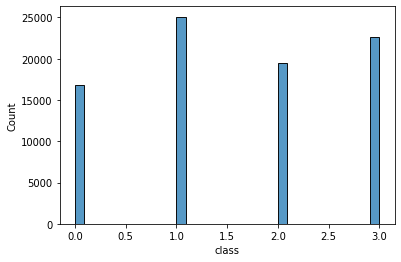

In [9]:
seaborn.histplot( y)

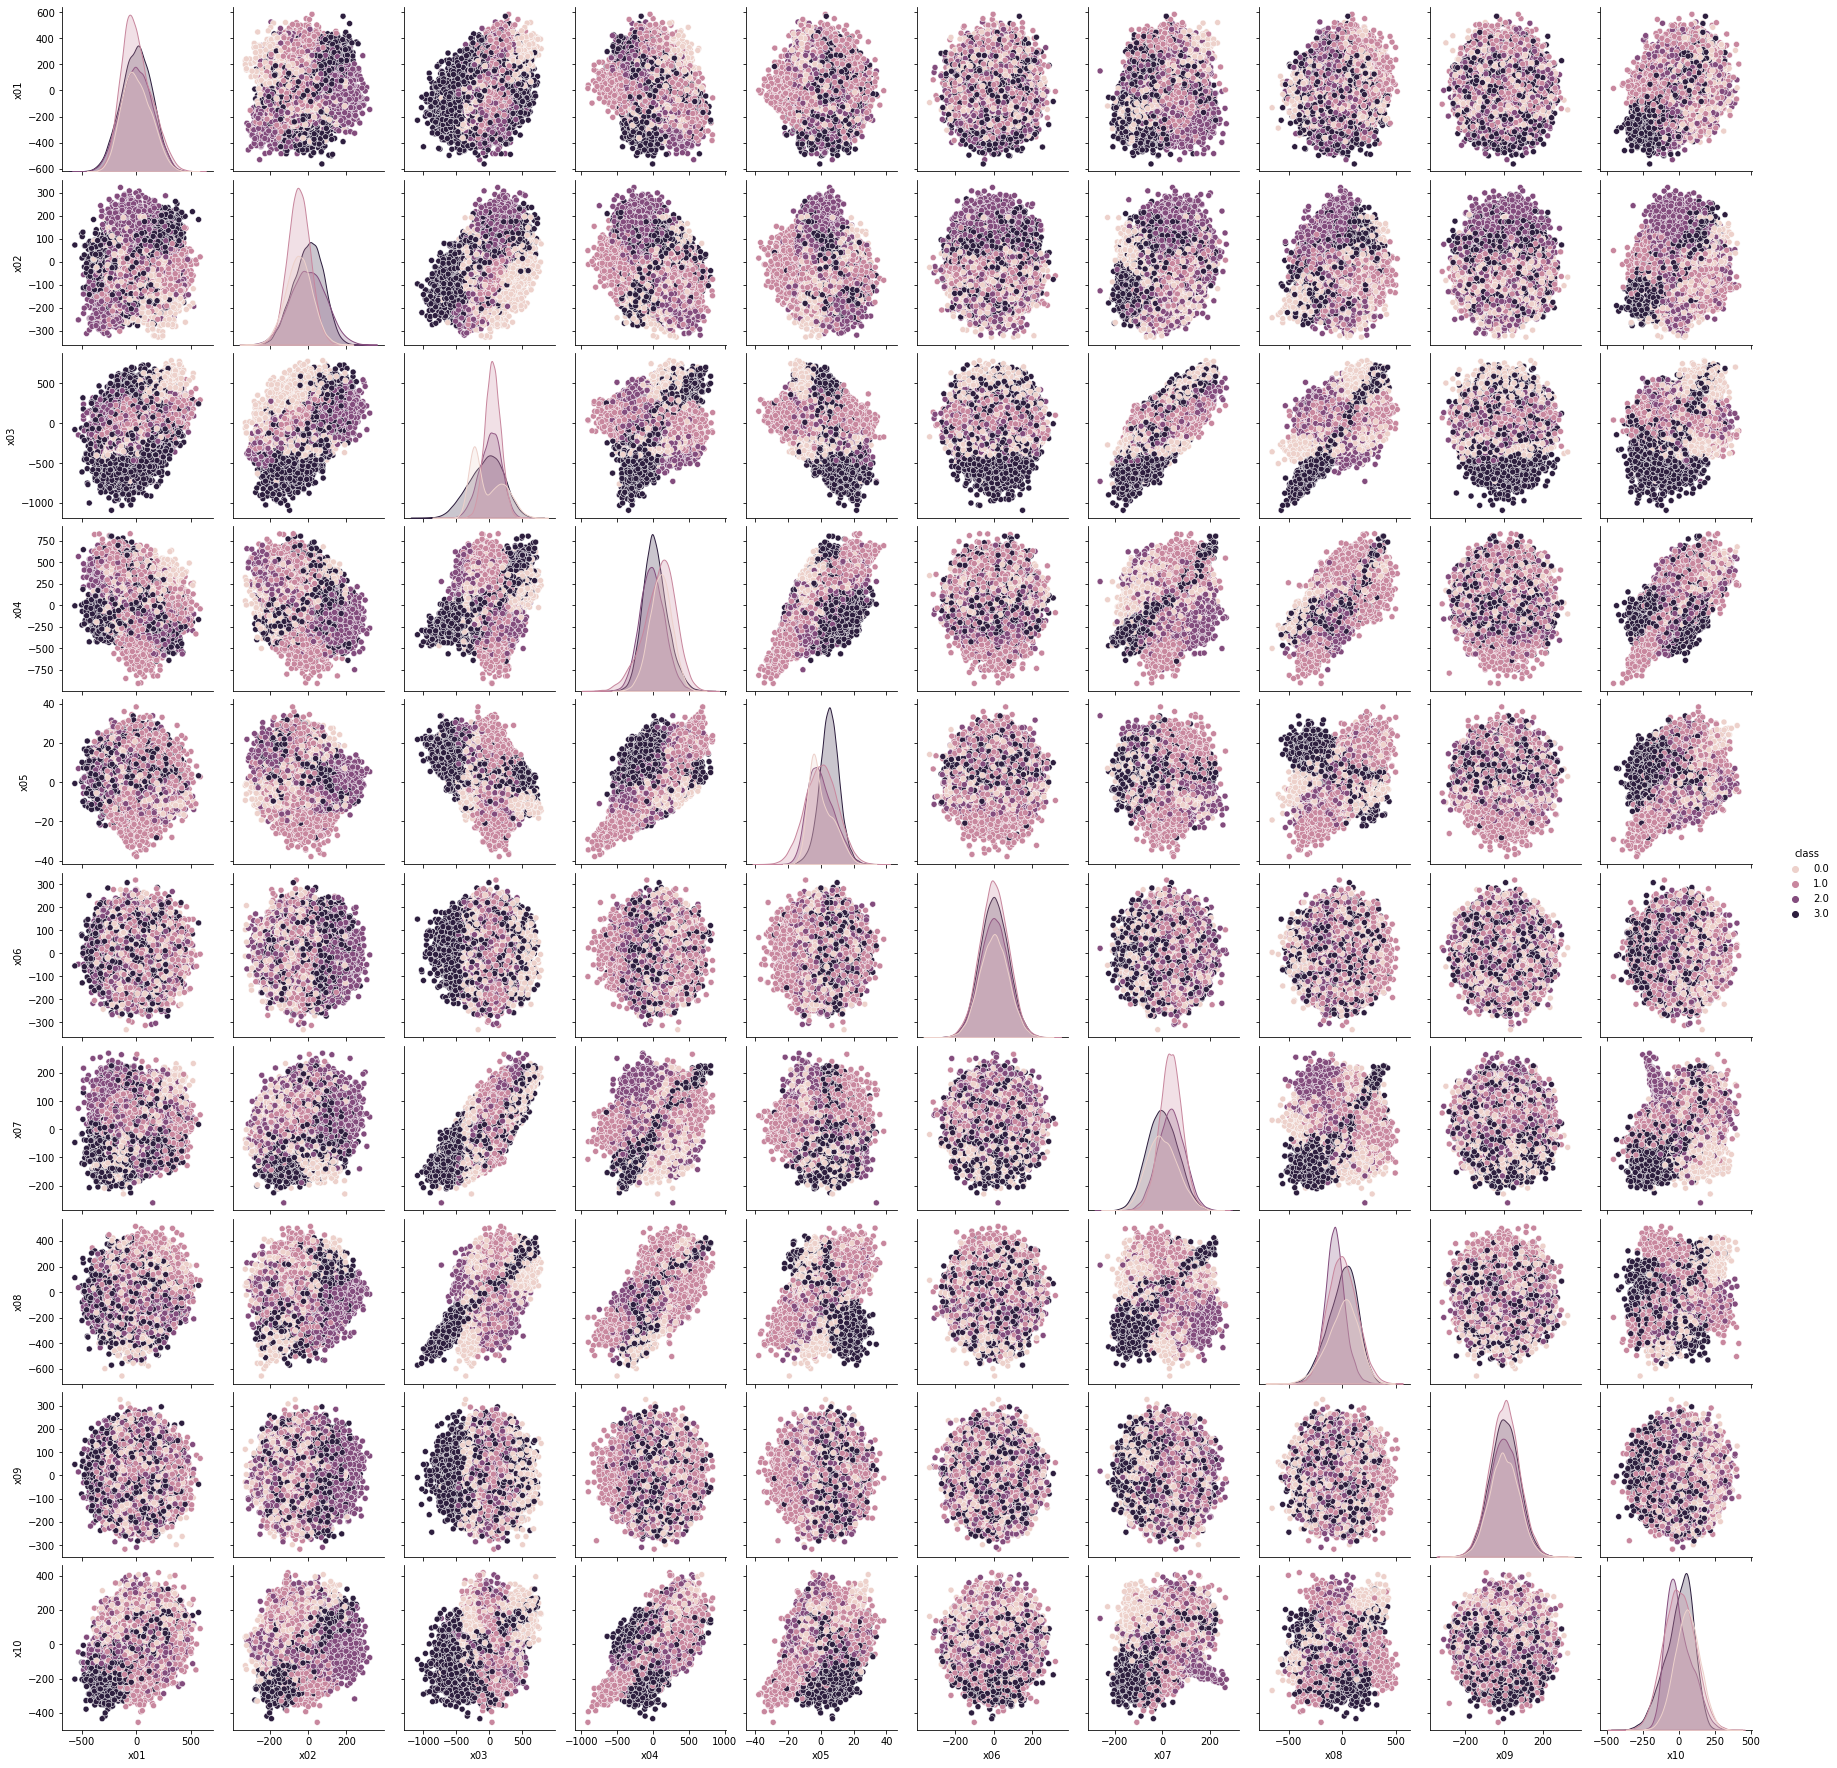

In [35]:
seaborn.pairplot(data, hue='class')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=77, shuffle=True)

In [50]:
import tensorflow as tf

from keras.models import Sequential       # основной класс для последовательного соединения слоёв
from keras.layers import Dense            # полносвязный слой (каждый нейрон в этом слое будет соединён с каждым в соседнем)
from keras import metrics                 # метрики качества

from tensorflow.keras.optimizers import Adam         # класс для подбора параметров нейросети (модификация градиентного пуска)
from tensorflow.keras.utils import to_categorical

In [32]:
y_train11=to_categorical(y_train)
y_test11=to_categorical(y_test)

In [55]:
y_train

32230    2.0
1224     1.0
24151    1.0
47629    3.0
22755    2.0
        ... 
7832     1.0
59348    3.0
61012    2.0
74335    3.0
47831    2.0
Name: class, Length: 67200, dtype: float64

In [54]:
y_train11


array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)

In [34]:
X_train

x01         x02         x03         x04        x05         x06  \
32230  110.772609  -39.643179   52.986614  190.075736  -5.203663  -66.101706   
1224     2.031191 -125.796501  -69.616346 -108.218496  -7.438800   24.863850   
24151  139.799666  -63.140426   70.536329  235.344409   5.816581  100.452228   
47629 -186.674263  -41.876831 -473.009852 -206.049422   7.616989   92.685384   
22755  102.691930    6.874720 -145.476358 -346.193155  -6.250233 -195.103115   
...           ...         ...         ...         ...        ...         ...   
7832    10.861177   -1.799214   67.177402 -555.794311 -22.732574  -13.288089   
59348  181.060611   90.840568  101.418728  -21.890959   3.253789   11.535260   
61012  147.664400   41.490991  150.612715  -53.737503  -2.780044   -0.838819   
74335  -40.894324   77.376379  218.567084  171.561533  -1.643791  -83.446625   
47831  110.238854    9.924737   92.424425 -139.448670  -8.286358   -4.974864   

             x07         x08         x09         x10  
32230  18.894910  -20.033468  -11.027291  231.907086  
1224   17.175280 -175.393964   54.423083  -86.515838  
24151  77.723985   -8.763830   34.425863  127.308770  
47629 -88.191630 -218.814027   39.162998 -128.129779  
22755 -70.457810 -149.693051   -4.131025  -85.196533  
...          ...         ...         ...         ...  
7832   -4.073403 -256.441402   65.952660 -247.484874  
59348  10.828872   50.083220 -146.786073   80.342235  
61012  86.190433 -115.231838   33.495384   57.063169  
74335  46.289553  131.572831   82.754845  103.910177  
47831  24.712920  -94.368427  -61.016853    4.613897  

[67200 rows x 10 columns]

In [141]:
from keras.activations import sigmoid
model = Sequential()

model.add(Dense(20, input_dim=10, activation='relu'))
#model.add(Dense(10, input_dim=20, activation='relu'))
model.add(Dense(4,activation= 'sigmoid'))

opt = Adam(learning_rate=0.1)


model.compile(loss = 'categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [58]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11158718157107452761
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14415560704
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13371657729065667434
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [142]:

device_name = tf.test.gpu_device_name()
print(device_name )
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))



with tf.device('/device:GPU:0'): 
  model.fit( x=X_train, 
            y=y_train11, 
            epochs=77, 
            batch_size=X_train.shape[0])    
                                            
            

/device:GPU:0
Found GPU at: /device:GPU:0
Epoch 1/77
1/1 [==============================] - 0s 319ms/step - loss: 62.4700 - accuracy: 0.2112
Epoch 2/77
1/1 [==============================] - 0s 12ms/step - loss: 57.0115 - accuracy: 0.3275
Epoch 3/77
1/1 [==============================] - 0s 12ms/step - loss: 50.2894 - accuracy: 0.3474
Epoch 4/77
1/1 [==============================] - 0s 11ms/step - loss: 35.4800 - accuracy: 0.3674
Epoch 5/77
1/1 [==============================] - 0s 10ms/step - loss: 31.2699 - accuracy: 0.4184
Epoch 6/77
1/1 [==============================] - 0s 10ms/step - loss: 20.5655 - accuracy: 0.5218
Epoch 7/77
1/1 [==============================] - 0s 11ms/step - loss: 21.3102 - accuracy: 0.4933
Epoch 8/77
1/1 [==============================] - 0s 11ms/step - loss: 20.0739 - accuracy: 0.5056
Epoch 9/77
1/1 [==============================] - 0s 13ms/step - loss: 18.2370 - accuracy: 0.5121
Epoch 10/77
1/1 [==============================] - 0s 10ms/step - loss: 12.

In [129]:
_, accuracy = model.evaluate(X_test,y_test11)

print(f'Accuracy:  {accuracy*100:.2f}')

525/525 [==============================] - 1s 2ms/step - loss: 0.5838 - accuracy: 0.7918
Accuracy:  79.18
